### Scraping for Coding Challenge 5

This notebook scrapes the UN NEWS website: https://news.un.org/en/news?page=0

In [32]:
#reading required libraries

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import matplotlib.pyplot as plt

In [ ]:
# Base URL for UN News + page 
BASE_URL = "https://news.un.org/en/news?page={page}"

data = []

def scrape_page(page):
    #Scrape titles, dates, and topics from a single UN News page
    url = BASE_URL.format(page=page)
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to fetch page {page}: {response.status_code}")
        return
    
    soup = BeautifulSoup(response.content, "html.parser")
    
    titles = soup.select(".node__title a")
    dates = soup.select(".datetime")
    topics = soup.select(".field--type-entity-reference a")
    
    for i in range(len(titles)):
        title = titles[i].get_text(strip=True) if i < len(titles) else None
        date = dates[i].get_text(strip=True) if i < len(dates) else None
        topic = topics[i].get_text(strip=True) if i < len(topics) else None
        
        data.append({
            "Title": title,
            "Date": date,
            "Topic": topic
        })

# Iterate through all 2024 pages
for page in range(1, 198):
    print(f"Scraping page {page}...")
    scrape_page(page)
    time.sleep(random.uniform(1, 3))  # Random delay between requests

# Save to DataFrame
db_un_news = pd.DataFrame(data)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [23]:
#save to csv
db_un_news.to_csv("db_un_news.csv", index=False)

In [ ]:
# Count the frequency of each topic
#remove blank topics
db_un_news = db_un_news[db_un_news['Topic'] != '']
topic_counts = db_un_news['Topic'].value_counts().head(10)  # Top 10 topics

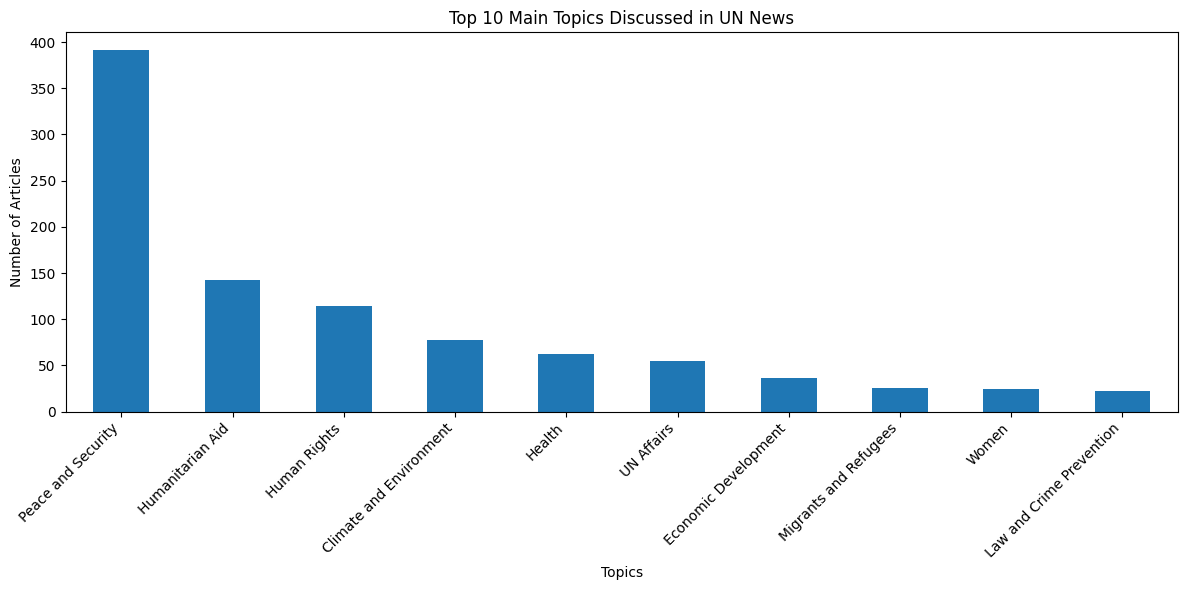

In [33]:
# Plot the data
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar')
plt.title('Top 10 Main Topics Discussed in UN News')
plt.xlabel('Topics')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()